<a href="https://colab.research.google.com/github/GyanendraChaubey/Python-Tutorials/blob/main/PCA_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eig
from numpy.linalg import eig 

In [83]:
#two dimension data
data=np.array([[3,4],[2,8],[6,9],[10,12]])

In [84]:
print(data)

[[ 3  4]
 [ 2  8]
 [ 6  9]
 [10 12]]


In [85]:
#create a dataframe
df=pd.DataFrame(data,columns=['ML','DL'])

In [86]:
df

,ML,DL
0,3,4
1,2,8
2,6,9
3,10,12


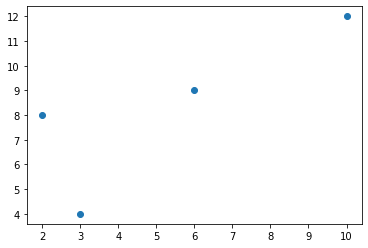

In [87]:
plt.scatter(df['ML'],df['DL'])

PCA -Steps
1. Standardization (zero centric data)
2. Finding Covariance Matrix
3. Eigen Values and Eigen Vectors
4. Find Principle components

In [88]:
data.T

array([[ 3,  2,  6, 10],
       [ 4,  8,  9, 12]])

In [89]:
meanbycol=np.mean(data.T,axis=1)

In [90]:
meanbycol

array([5.25, 8.25])

In [91]:
scaled_data=data-meanbycol

In [92]:
scaled_data

array([[-2.25, -4.25],
       [-3.25, -0.25],
       [ 0.75,  0.75],
       [ 4.75,  3.75]])

In [93]:
#Step-2 cov matrix because we want relation between variables

In [94]:
np.cov(scaled_data.T)

array([[12.91666667,  9.58333333],
       [ 9.58333333, 10.91666667]])

In [95]:
cov_mat=np.cov(scaled_data.T)

In [96]:
#step-3 Find Eigen Value and Eigen Vector

In [97]:
eig_value, eig_vector=np.linalg.eig(cov_mat)

In [98]:
eig_value

array([21.55203266,  2.28130068])

In [99]:
eig_vector

array([[ 0.74289445, -0.66940857],
       [ 0.66940857,  0.74289445]])

In [100]:
scaled_data

array([[-2.25, -4.25],
       [-3.25, -0.25],
       [ 0.75,  0.75],
       [ 4.75,  3.75]])

In [101]:
eig_vector.T.dot(scaled_data.T).T

array([[-4.51649894, -1.65113213],
       [-2.58175911,  1.98985424],
       [ 1.05922727,  0.05511441],
       [ 6.03903078, -0.39383652]])

In [102]:
from sklearn.decomposition import PCA

In [103]:
pca=PCA()

In [104]:
pca.fit_transform(scaled_data)

array([[-4.51649894, -1.65113213],
       [-2.58175911,  1.98985424],
       [ 1.05922727,  0.05511441],
       [ 6.03903078, -0.39383652]])

In [105]:
pd.DataFrame(data=pca.fit_transform(scaled_data),columns=['PC1','PC2'])

,PC1,PC2
0,-4.516499,-1.651132
1,-2.581759,1.989854
2,1.059227,0.055114
3,6.039031,-0.393837


In [106]:
pca.inverse_transform(pca.fit_transform(scaled_data))

array([[-2.25, -4.25],
       [-3.25, -0.25],
       [ 0.75,  0.75],
       [ 4.75,  3.75]])

In [107]:
pca.explained_variance_ratio_

array([0.90428109, 0.09571891])

In [108]:
'''model for machine leaning
there is two columns
pc1 containing more variation'''

'model for machine leaning\nthere is two columns\npc1 containing more variation'

In [109]:
new_data=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data')

In [110]:
new_data.columns=[ 'Id','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type of glass']

In [111]:
pca_data=new_data.drop(labels=['Id','Type of glass'],axis=1)

In [112]:
pca_data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26


In [113]:
pca_data.isnull().sum()

RI    0
Na    0
Mg    0
Al    0
Si    0
K     0
Ca    0
Ba    0
Fe    0
dtype: int64

In [114]:
pca_data.describe().T

,count,mean,std,min,25%,50%,75%,max
RI,213.0,1.518353,0.003039,1.51115,1.51652,1.51768,1.51915,1.53393
Na,213.0,13.406761,0.818371,10.73000,12.90000,13.30000,13.83000,17.38000
Mg,213.0,2.676056,1.440453,0.00000,2.09000,3.48000,3.60000,3.98000
Al,213.0,1.446526,0.499882,0.29000,1.19000,1.36000,1.63000,3.50000
Si,213.0,72.655023,0.774052,69.81000,72.28000,72.79000,73.09000,75.41000
K,213.0,0.499108,0.653035,0.00000,0.13000,0.56000,0.61000,6.21000
Ca,213.0,8.957934,1.426435,5.43000,8.24000,8.60000,9.18000,16.19000
Ba,213.0,0.175869,0.498245,0.00000,0.00000,0.00000,0.00000,3.15000
Fe,213.0,0.057277,0.097589,0.00000,0.00000,0.00000,0.10000,0.51000


In [115]:
from sklearn.preprocessing import StandardScaler

In [116]:
sc=StandardScaler()

In [117]:
scaled_data=sc.fit_transform(pca_data)

In [118]:
scaled_data

array([[-0.2451006 ,  0.59188032,  0.64293659, ..., -0.79259935,
        -0.35380764, -0.58830108],
       [-0.71682556,  0.15094587,  0.60814353, ..., -0.82773435,
        -0.35380764, -0.58830108],
       [-0.22860672, -0.24099586,  0.7055641 , ..., -0.51854637,
        -0.35380764, -0.58830108],
       ...,
       [ 0.75772729,  1.16754474, -1.8621639 , ..., -0.36395239,
         2.94550057, -0.58830108],
       [-0.60796596,  1.19204109, -1.8621639 , ..., -0.33584439,
         2.80467644, -0.58830108],
       [-0.4100394 ,  1.00831841, -1.8621639 , ..., -0.2374664 ,
         3.00585377, -0.58830108]])

In [119]:
scaled_data=pd.DataFrame(data=scaled_data,columns=pca_data.columns)

In [120]:
#Step-2 Find pca

In [121]:
from sklearn.decomposition import PCA

In [122]:
pca=PCA()

In [123]:
pca_data=pca.fit_transform(scaled_data)

In [124]:
var=pca.explained_variance_ratio_

In [125]:
var

array([2.78925243e-01, 2.28432952e-01, 1.56446801e-01, 1.27580286e-01,
       1.01684574e-01, 5.86461415e-02, 4.10083097e-02, 7.09648332e-03,
       1.79209062e-04])

In [126]:
pd.DataFrame(data=pca.fit_transform(pca_data),columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9'])

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,-0.577410,-0.755555,-0.541311,0.775011,-0.265563,-0.111058,-0.028551,-0.286245,-0.010526
1,-0.942222,-0.924947,-0.549537,0.218914,-0.240031,0.127787,-0.370186,-0.097685,0.021797
2,-0.145210,-0.960824,-0.109843,0.423085,-0.481010,0.289024,-0.057620,-0.005005,0.092150
3,-0.353912,-1.090275,-0.484283,0.083220,-0.434338,0.300431,0.154550,-0.192563,0.002486
4,-0.284636,-1.329052,0.846054,-0.915688,1.818969,-0.146221,-0.259813,0.033631,-0.001834
...,...,...,...,...,...,...,...,...,...
208,-2.356322,3.070655,0.088726,-0.396994,0.113199,0.224990,-1.315863,0.188878,-0.028687
209,-2.372941,3.117594,-1.107207,0.297590,0.624278,0.618296,0.580664,0.132224,-0.013739
210,-1.653157,3.288638,-0.931207,-0.167576,0.456105,1.245493,0.673050,-0.890097,0.046444
211,-2.344375,2.763794,-1.240853,-0.514163,0.521900,1.000294,0.678532,0.076042,-0.027421


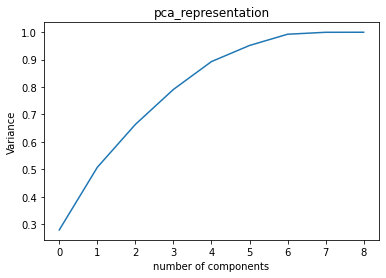

In [127]:
plt.figure()
plt.plot(np.cumsum(var))
plt.xlabel('number of components')
plt.ylabel('Variance')
plt.title('pca_representation')
plt.show()

In [128]:
sum(sorted(var,reverse=True)[:6])

0.9517159978858756

In [129]:
pca.inverse_transform(pca.fit_transform(pca_data))

array([[-0.57740964, -0.75555522, -0.54131111, ..., -0.02855076,
        -0.28624473, -0.01052633],
       [-0.9422224 , -0.92494715, -0.54953705, ..., -0.3701861 ,
        -0.09768518,  0.0217974 ],
       [-0.14521009, -0.96082439, -0.10984278, ..., -0.0576203 ,
        -0.00500546,  0.09215013],
       ...,
       [-1.65315732,  3.28863753, -0.93120716, ...,  0.6730498 ,
        -0.89009734,  0.04644362],
       [-2.34437523,  2.76379413, -1.2408532 , ...,  0.67853223,
         0.07604161, -0.02742114],
       [-2.23570365,  3.03487926, -0.8950945 , ...,  0.46165628,
         0.06444171, -0.01953852]])